In [5]:
# Feature Engineering

## The goals of this course are to:

-   Understand the importance of feature engineering
-   Learn how to create new features from existing data
-   Learn how to use domain knowledge to create new features
-   Learn how to encode categorical variables for machine learning
-   Learn how to handle missing values in a dataset
-   Learn how to deal with time series data
-   Learn how to scale features for machine learning
-   Learn how to evaluate features
-   Learn how to use Pandas and Scikit-Learn to engineer features

In [8]:
#Load Data
#Fuel economy data from the U.S. Environmental Protection Agency (EPA) for 2019 model year vehicles. The data are available in a CSV file with 82,000 rows and 83 columns.

#https://www.fueleconomy.gov/feg/epadata/vehicles.csv

In [15]:

## Step 1: Install Dependencies
# Ensure that the required libraries are installed
!pip install pyarrow


In [10]:

## Step 2: Load the Dataset
# Download the dataset directly from the provided URL and load it into a Pandas DataFrame

import pandas as pd
url = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv' 

raw = pd.read_csv(url)#, dtype_backend='pyarrow', engine='pyarrow')

C:\Users\mhanif\AppData\Local\Temp\ipykernel_66612\794973991.py:4: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(url)#, dtype_backend='pyarrow', engine='pyarrow')


In [11]:
raw

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48346,13.523182,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
48347,12.935217,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
48348,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
48349,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [12]:
raw.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'baseModel',
       'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2',
       'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn'

In [17]:
# Fuel Economy Prediction Project

import pandas as pd

# Dataset URL
url = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv'

# Load the dataset using pyarrow for optimized performance
raw = pd.read_csv(url, dtype_backend='pyarrow', engine='pyarrow')

# Display the columns of the dataset
print(raw.columns)

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'baseModel',
       'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2',
       'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn'

In [18]:
## Step 3: Initial Exploration
# Perform basic exploratory data analysis (EDA) to understand the dataset
# Display the first few rows
print(raw.head())

   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0        0.0        0.0      19      0.0        0   
1  27.046364         0.0        0.0        0.0       9      0.0        0   
2  11.018889         0.0        0.0        0.0      23      0.0        0   
3  27.046364         0.0        0.0        0.0      10      0.0        0   
4  15.658421         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...                            0.0              
1       0.0     0.0    0.0  ...                            0.0              
2       0.0     0.0    0.0  ...                            0.0              
3       0.0     0.0    0.0  ...                            0.0              
4       0.0     0.0    0.0  ...                            0.0              

                      createdOn                    modifiedOn  startStop  \
0  T

In [19]:
# Check for missing values
print(raw.isna().sum())

barrels08     0
barrelsA08    0
charge120     0
charge240     0
city08        0
             ..
modifiedOn    0
startStop     0
phevCity      0
phevHwy       0
phevComb      0
Length: 84, dtype: int64


In [20]:
# Display data types and basic statistics
print(raw.info())
print(raw.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48351 entries, 0 to 48350
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   barrels08        48351 non-null  double[pyarrow]
 1   barrelsA08       48351 non-null  double[pyarrow]
 2   charge120        48351 non-null  double[pyarrow]
 3   charge240        48351 non-null  double[pyarrow]
 4   city08           48351 non-null  int64[pyarrow] 
 5   city08U          48351 non-null  double[pyarrow]
 6   cityA08          48351 non-null  int64[pyarrow] 
 7   cityA08U         48351 non-null  double[pyarrow]
 8   cityCD           48351 non-null  double[pyarrow]
 9   cityE            48351 non-null  double[pyarrow]
 10  cityUF           48351 non-null  double[pyarrow]
 11  co2              48351 non-null  int64[pyarrow] 
 12  co2A             48351 non-null  int64[pyarrow] 
 13  co2TailpipeAGpm  48351 non-null  double[pyarrow]
 14  co2TailpipeGpm   48351

In [21]:
## Step 4: Feature Selection
# Select important features for analysis and modeling
# Define the columns to keep
selected_columns = [
    'year', 'make', 'model', 'barrels08', 'city08', 'comb08', 'highway08',
    'cylinders', 'displ', 'fuelCost08', 'drive', 'trany'
]


In [22]:
# Create a new DataFrame with the selected columns
data = raw[selected_columns]


In [23]:
# Display the first few rows of the filtered data
print(data.head())

   year        make                model  barrels08  city08  comb08  \
0  1985  Alfa Romeo   Spider Veloce 2000  14.167143      19      21   
1  1985     Ferrari           Testarossa  27.046364       9      11   
2  1985       Dodge              Charger  11.018889      23      27   
3  1985       Dodge  B150/B250 Wagon 2WD  27.046364      10      11   
4  1993      Subaru     Legacy AWD Turbo  15.658421      17      19   

   highway08  cylinders  displ  fuelCost08                       drive  \
0         25          4    2.0        2200            Rear-Wheel Drive   
1         14         12    4.9        4250            Rear-Wheel Drive   
2         33          4    2.2        1750           Front-Wheel Drive   
3         12          8    5.2        4250            Rear-Wheel Drive   
4         23          4    2.2        3150  4-Wheel or All-Wheel Drive   

             trany  
0     Manual 5-spd  
1     Manual 5-spd  
2     Manual 5-spd  
3  Automatic 3-spd  
4     Manual 5-spd  


In [ ]:
## Step 5: Handle Missing Values
# Fill missing values using appropriate strategies
from sklearn.impute import SimpleImputer

In [24]:
# Define imputers for different data types
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [25]:
# Impute numerical and categorical columns
numerical_cols = ['barrels08', 'city08', 'comb08', 'highway08', 'cylinders', 'displ', 'fuelCost08']
categorical_cols = ['drive', 'trany']

data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Verify no missing values remain
print(data.isna().sum())

year          0
make          0
model         0
barrels08     0
city08        0
comb08        0
highway08     0
cylinders     0
displ         0
fuelCost08    0
drive         0
trany         0
dtype: int64


C:\Users\mhanif\AppData\Local\Temp\ipykernel_66612\2282239051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
C:\Users\mhanif\AppData\Local\Temp\ipykernel_66612\2282239051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])


In [28]:
## Step 6: Feature Engineering
# Create new features to enhance the dataset
# Create a cost-per-mile feature
data['cost_per_mile'] = data['fuelCost08'] / data['comb08']

# Categorize fuel efficiency
data['efficiency_category'] = pd.cut(
    data['city08'], bins=[0, 15, 25, 40, 100], labels=['Low', 'Medium', 'High', 'Very High']
)

# Display the new features
print(data.head())


   year        make                model  barrels08  city08  comb08  \
0  1985  Alfa Romeo   Spider Veloce 2000  14.167143    19.0    21.0   
1  1985     Ferrari           Testarossa  27.046364     9.0    11.0   
2  1985       Dodge              Charger  11.018889    23.0    27.0   
3  1985       Dodge  B150/B250 Wagon 2WD  27.046364    10.0    11.0   
4  1993      Subaru     Legacy AWD Turbo  15.658421    17.0    19.0   

   highway08  cylinders  displ  fuelCost08                       drive  \
0       25.0        4.0    2.0      2200.0            Rear-Wheel Drive   
1       14.0       12.0    4.9      4250.0            Rear-Wheel Drive   
2       33.0        4.0    2.2      1750.0           Front-Wheel Drive   
3       12.0        8.0    5.2      4250.0            Rear-Wheel Drive   
4       23.0        4.0    2.2      3150.0  4-Wheel or All-Wheel Drive   

             trany  cost_per_mile efficiency_category  
0     Manual 5-spd     104.761905              Medium  
1     Manual 5-s

C:\Users\mhanif\AppData\Local\Temp\ipykernel_66612\2691639006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cost_per_mile'] = data['fuelCost08'] / data['comb08']
C:\Users\mhanif\AppData\Local\Temp\ipykernel_66612\2691639006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['efficiency_category'] = pd.cut(


C:\Users\mhanif\AppData\Local\Temp\ipykernel_66612\1332124020.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['city08', 'barrels08']] = knn_imputer.fit_transform(data[['city08', 'barrels08']])


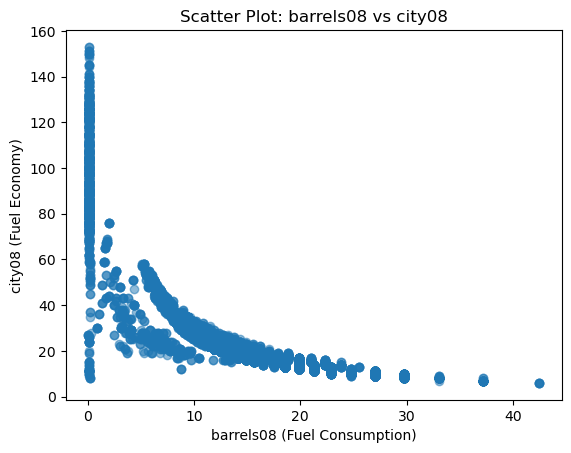

In [34]:
## Step 7: Data Visualization
# Perform additional data imputation for city08 and barrels08 before visualization
from sklearn.impute import KNNImputer

# Use KNN Imputer for more accurate missing value estimation
knn_imputer = KNNImputer(n_neighbors=5)
data[['city08', 'barrels08']] = knn_imputer.fit_transform(data[['city08', 'barrels08']])

# Visualize the relationships between features
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: barrels08 vs city08
plt.scatter(data['barrels08'], data['city08'], alpha=0.5)
plt.xlabel('barrels08 (Fuel Consumption)')
plt.ylabel('city08 (Fuel Economy)')
plt.title('Scatter Plot: barrels08 vs city08')
plt.show()


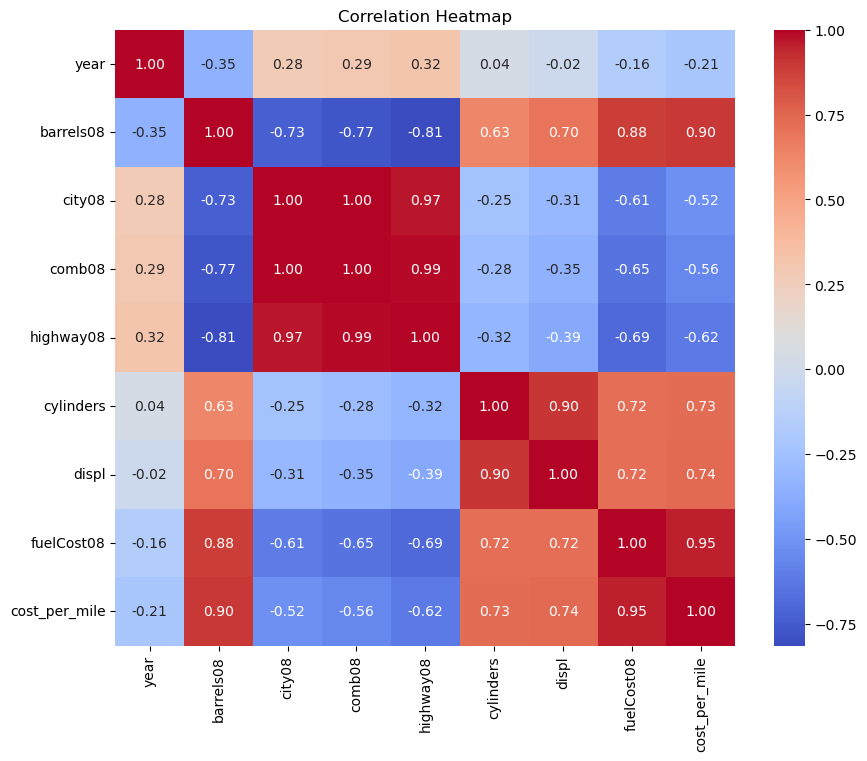

In [35]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
## Step 8: Model Training
# Train and compare multiple regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define X and y
X = data[['barrels08', 'cylinders', 'displ', 'fuelCost08']]
y = data['city08']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MAE': mae, 'R2': r2}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name} - MAE: {metrics['MAE']:.2f}, R²: {metrics['R2']:.2f}")

## Step 9: Model Improvement
# Apply log transformation if the relationship is non-linear
import numpy as np

# Apply log transformation to barrels08
X['barrels08_log'] = np.log(X['barrels08'])

# Update training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[['barrels08_log', 'cylinders', 'displ', 'fuelCost08']], y, test_size=0.25, random_state=42)

# Retrain the models with log-transformed data
results_log = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results_log[name] = {'MAE': mae, 'R2': r2}

# Display results for log-transformed data
print("\nResults after Log Transformation:")
for model_name, metrics in results_log.items():
    print(f"{model_name} - MAE: {metrics['MAE']:.2f}, R²: {metrics['R2']:.2f}")

## Step 10: Save and Document
# Save the final DataFrame and model
# Document the code and results on GitHub with clear instructions for others to follow

# Save the processed dataset
processed_file = 'processed_vehicles.csv'
data.to_csv(processed_file, index=False)
print(f'Dataset saved to {processed_file}')


Linear Regression - MAE: 4.41, R²: 0.62
Random Forest - MAE: 0.48, R²: 1.00
XGBoost - MAE: 0.53, R²: 0.99


C:\Users\mhanif\AppData\Local\Temp\ipykernel_66612\4221199329.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['barrels08_log'] = np.log(X['barrels08'])



Results after Log Transformation:
Linear Regression - MAE: 1.71, R²: 0.90
Random Forest - MAE: 0.48, R²: 1.00
XGBoost - MAE: 0.53, R²: 0.99
Dataset saved to processed_vehicles.csv
